In [1]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import shap
import matplotlib.pyplot as plt
import numpy as np

import warnings
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sys import path
import os
for dirname, _, filenames in os.walk('../resources/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
path.append(os.path.realpath('../'))

from custom import funtions

shap.initjs()
warnings.filterwarnings('ignore')

../resources/allColProSol.xlsx
../resources/dataset_a_2021.csv
../resources/dataset_a_2021v1.xlsx
../resources/dataset_unab_ORIGINAL SIN P1.csv
../resources/dataset_unab_P1.csv
../resources/exitoFallidoEnviosProgramaSol.xlsx
../resources/exitoFallidoProgramaSol.xlsx
../resources/exitosoFallidosEnviosAllColProSol.xlsx
../resources/exitosoFallidosEnviosAllColSol.xlsx
../resources/exitososFallidosEnviosSol.xlsx
../resources/Hito12sinColCeroExitosoFallidosSol.xlsx
../resources/sinColCeroExitosoFallidosEnviosSol.xlsx
../resources/sinColCeroExitosoFallidosSol.xlsx
../resources/v2_hitosExitoFalloColESol1.csv


In [2]:
df = pd.read_csv("../resources/v2_hitosExitoFalloColESol1.csv", delimiter=";", skipinitialspace=True)

In [3]:
# Convertir la columna "sol1" a números de punto flotante
df['sol1'] = df['sol1'].astype(float)
df['exitosos'] = df['exitosos'].astype(int)
df['fallidos'] = df['fallidos'].astype(int)

In [4]:
#creando columna aprobado y con la funcion set_in_aprobado_nota poblamos la nueva columna.
df['aprobado']=df.apply(lambda x: funtions.set_in_aprobado_nota(x['sol1']),axis = 1 )
#revisamos la existencia de la nueva columna.
print(df.columns)

Index(['hito1', 'hito2', 'exitosos', 'fallidos', 'e0', 'e1', 'e2', 'e3', 'e4',
       'e5', 'e6', 'e7', 'e8', 'e9', 'e10', 'e11', 'e12', 'e13', 'e14', 'e15',
       'e16', 'e17', 'e18', 'e19', 'e20', 'e21', 'e22', 'e23', 'e24', 'e25',
       'e26', 'e27', 'e28', 'e29', 'e30', 'e31', 'e32', 'e33', 'e34', 'e35',
       'e36', 'e37', 'e38', 'e39', 'e40', 'e41', 'e42', 'e43', 'e44', 'e45',
       'e46', 'e47', 'e48', 'e49', 'e50', 'e51', 'e52', 'sol1', 'aprobado'],
      dtype='object')


In [5]:
# Selección de características y variable objetivo
y = df['aprobado']
X = df[
    [
        "exitosos",
        "fallidos",
        "hito1",
        "hito2",
        "e0",
        "e1",
        "e3",
        "e4",
        "e6",
        "e7",
        "e9",
        "e10",
        "e11",
        "e12",
        "e13",
        "e17",
        "e18",
        "e21",
        "e22",
        "e23",
        "e25",
        "e26",
        "e28",
        "e29",
        "e32",
        "e35",
        "e37",
        "e38",
        "e42",
        "e44"
    ]
]

In [6]:
# División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

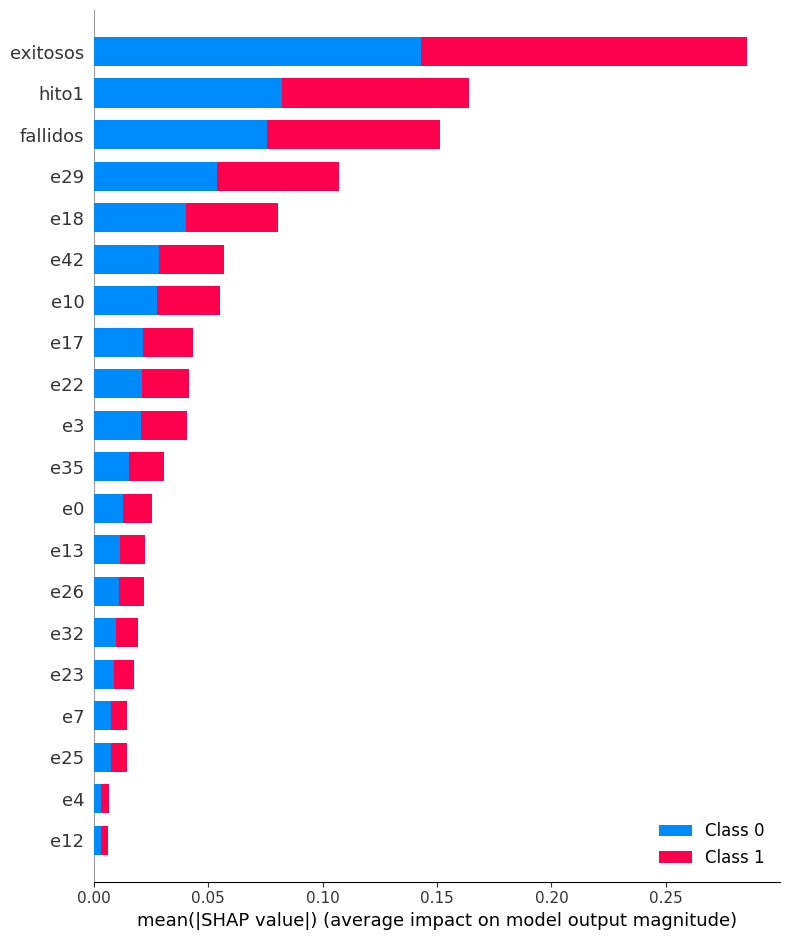

In [7]:
# arbol de decision
# Explicación de las predicciones utilizando SHAP
# Entrenamiento de los modelos
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

explainer = shap.Explainer(dt)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

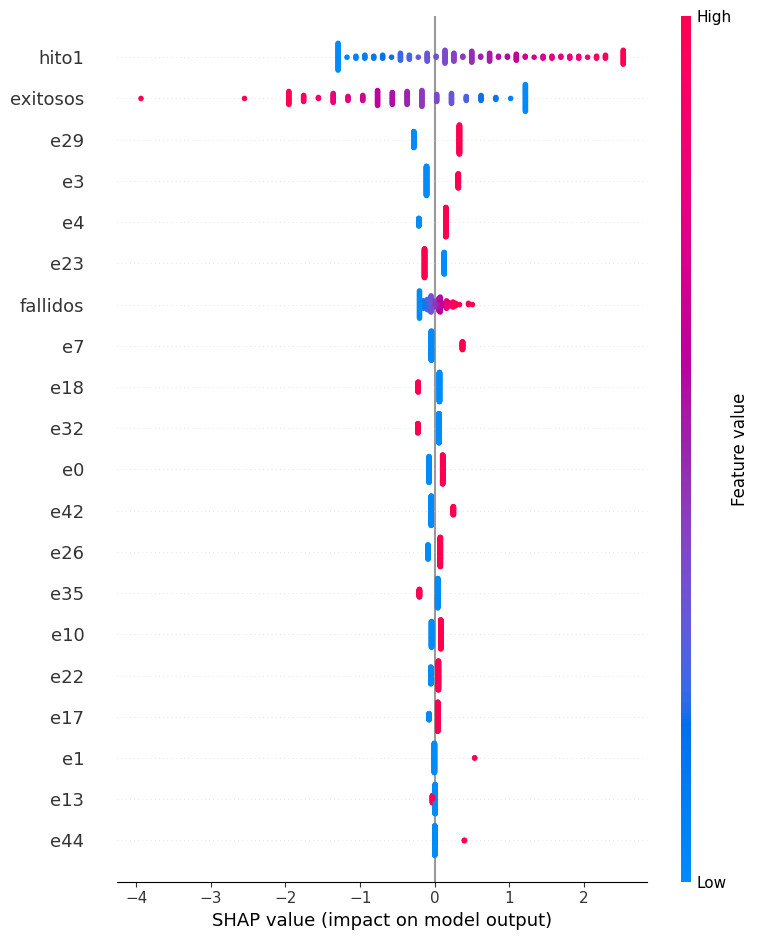

In [8]:
#Regresion logistica
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Explicación de las predicciones utilizando SHAP
explainer = shap.LinearExplainer(lr, X_train)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

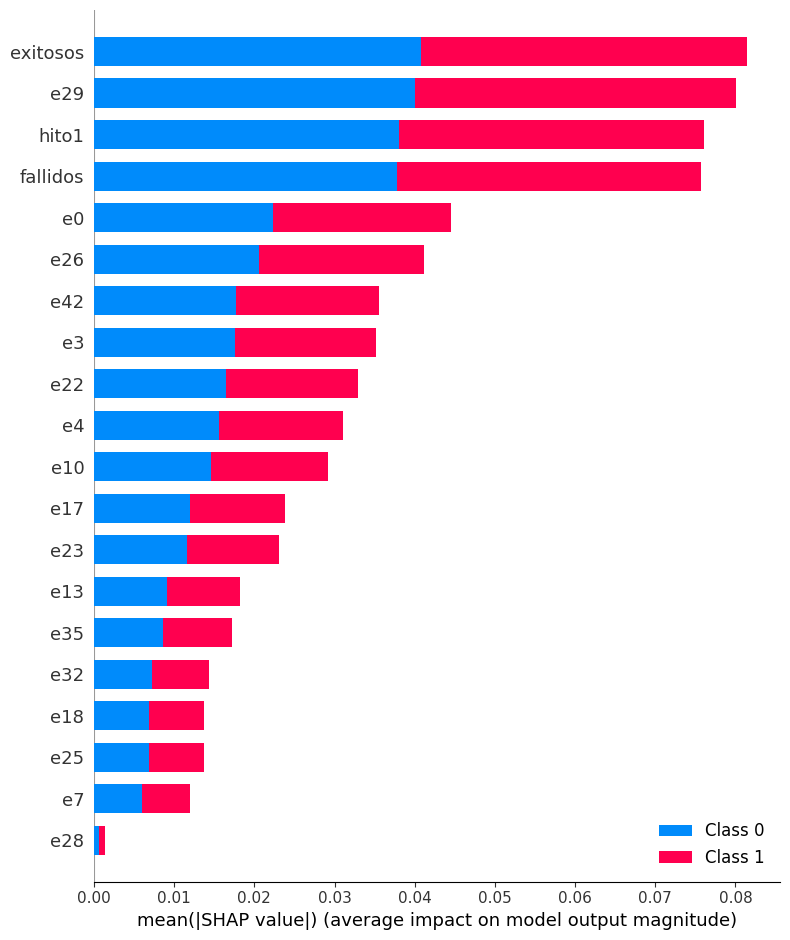

In [9]:
#regrecion con bosques aleatorios.
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
# Explicación de las predicciones utilizando SHAP
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

In [10]:
# Predicciones
pred_lr = lr.predict(X_test)
pred_dt = dt.predict(X_test)
pred_rf = rf.predict(X_test)

In [11]:
# Cálculo de la precisión
accuracy_lr = accuracy_score(y_test, pred_lr)
accuracy_dt = accuracy_score(y_test, pred_dt)
accuracy_rf = accuracy_score(y_test, pred_rf)

In [12]:
precision_lr = precision_score(y_test, pred_lr)
precision_dt = precision_score(y_test, pred_dt)
precision_rf = precision_score(y_test, pred_rf)

In [13]:
recall_lr = recall_score(y_test, pred_lr)
recall_dt = recall_score(y_test, pred_dt)
recall_rf = recall_score(y_test, pred_rf)

In [14]:
f1_lr = f1_score(y_test, pred_lr)
f1_dt = f1_score(y_test, pred_dt)
f1_rf = f1_score(y_test, pred_rf)

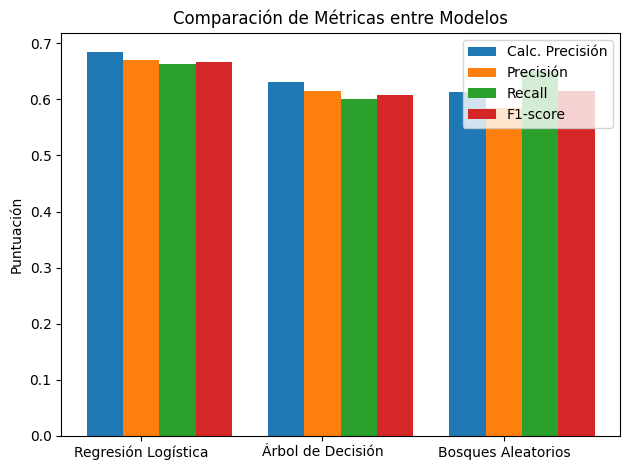

In [15]:
# Creación del gráfico comparativo
models = ['Regresión Logística', 'Árbol de Decisión', 'Bosques Aleatorios']
accuracy = [accuracy_lr, accuracy_dt, accuracy_rf]
precision = [precision_lr, precision_dt, precision_rf]
recall = [recall_lr, recall_dt, recall_rf]
f1_score = [f1_lr, f1_dt, f1_rf]

x = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, accuracy, width, label='Calc. Precisión')
rects2 = ax.bar(x, precision, width, label='Precisión')
rects3 = ax.bar(x + width, recall, width, label='Recall')
rects4 = ax.bar(x + 2 * width, f1_score, width, label='F1-score')

ax.set_ylabel('Puntuación')
ax.set_title('Comparación de Métricas entre Modelos')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

fig.tight_layout()
plt.show()